# Dataset proces
This file analyse, preprocess, and create dataset.

- Analyse
  
On this stage we detect language, show all unique keywords,
evaluate number of words in each field, count number of empty fields
- Preproves

On this stage we: split string of fields into array of words,
stem (remove endings "doing -> do") them, lower case
- Create datasets

We created dataset with no stemming and with stemming

Download all needed libs:
- langdetect (for detecting language in data understanding (eda) stage)
- gensim for vocabulary and tokenization
- nltk split by words

In [7]:
# !pip install langdetect
# ! pip install gensim
# !pip install sklearn
# !pip install nltk

In [7]:
import nltk
# nltk.download('punkt')

In [6]:
import os
import pandas as pd
import collections
from collections import defaultdict

In [5]:
'''
Here is constants
Constants
----------
    DATA_PATH: str
        path to store raw dataset with json metadata description
    PROCESSED_DATA_PATH: str
        path to store dataset created by this code
    DATA_INDEX_PATH: str
        path to store
    SEARCH_DATA_PATH: str
        path to search metadata dataset
'''
DATA_PATH = "../datasets/raw_datasets/kaggle"
PROCESSED_DATA_PATH = "../datasets/processed_datasets"
DATA_INDEX_PATH = "../datasets/"

SEARCH_DATA_PATH = "../datasets/raw_datasets/metadata-for-search"
SEARCH_DATA_INDEX_PATH = "../datasets/raw_datasets"

## data indexing
index is csv file which contain:
- path to each dataset "path_dataset",
- path to each metadata of dataset "path_metadata",
- author name of name of folder in DATA_PATH: "user_folder_name"
- name of dataset name of folder DATA_PATH/"user_folder_name" in "data_folder_name"

In [114]:
get_datasets_locations(SEARCH_DATA_PATH)

hacker-news/hacker-news
epa/epa-historical-air-quality


,user_folder_name,data_folder_name,path_dataset,path_metadata
0,sumon3455,bangla-sign-language-video-dataset,../datasets/raw_datasets/metadata-for-search/s...,../datasets/raw_datasets/metadata-for-search/s...
1,babaakki,imdb1000,../datasets/raw_datasets/metadata-for-search/b...,../datasets/raw_datasets/metadata-for-search/b...
2,harry418,dataset-for-mask-detection,../datasets/raw_datasets/metadata-for-search/h...,../datasets/raw_datasets/metadata-for-search/h...
3,varunguddeti,redwinequality,../datasets/raw_datasets/metadata-for-search/v...,../datasets/raw_datasets/metadata-for-search/v...
4,tevecsystems,retail-sales-forecasting,../datasets/raw_datasets/metadata-for-search/t...,../datasets/raw_datasets/metadata-for-search/t...
...,...,...,...,...
1911,pandrii000,hituav-a-highaltitude-infrared-thermal-dataset,../datasets/raw_datasets/metadata-for-search/p...,../datasets/raw_datasets/metadata-for-search/p...
1912,ignacioavas,alignmacrid-vae,../datasets/raw_datasets/metadata-for-search/i...,../datasets/raw_datasets/metadata-for-search/i...
1913,carrie1,ecommerce-data,../datasets/raw_datasets/metadata-for-search/c...,../datasets/raw_datasets/metadata-for-search/c...
1914,maxhorowitz,nflplaybyplay2009to2016,../datasets/raw_datasets/metadata-for-search/m...,../datasets/raw_datasets/metadata-for-search/m...


In [48]:
# # create and save index
# data_index = get_datasets_locations()
# data_index.to_csv(DATA_INDEX_PATH + "data_index.csv")
# data_index.head(5)

,user_folder_name,data_folder_name,path_dataset,path_metadata
0,vijendersingh412,research-paper,../datasets/raw_datasets/kaggle/vijendersingh4...,../datasets/raw_datasets/kaggle/vijendersingh4...
1,somumourya,news-recommendation-dataset,../datasets/raw_datasets/kaggle/somumourya/new...,../datasets/raw_datasets/kaggle/somumourya/new...
2,kamalesh1997,top-rated-movies-tmdb-data-set,../datasets/raw_datasets/kaggle/kamalesh1997/t...,../datasets/raw_datasets/kaggle/kamalesh1997/t...
3,charanjilagam,iplcleanedata,../datasets/raw_datasets/kaggle/charanjilagam/...,../datasets/raw_datasets/kaggle/charanjilagam/...
4,michaelbryantds,fivethirtyeight-polls,../datasets/raw_datasets/kaggle/michaelbryantd...,../datasets/raw_datasets/kaggle/michaelbryantd...
...,...,...,...,...
654,zaynshahbaz,pakistan-car-prices,../datasets/raw_datasets/kaggle/zaynshahbaz/pa...,../datasets/raw_datasets/kaggle/zaynshahbaz/pa...
655,adithyaawati,apartments-for-rent-classified,../datasets/raw_datasets/kaggle/adithyaawati/a...,../datasets/raw_datasets/kaggle/adithyaawati/a...
656,deepak007chaubey,flight-on-time-dataset,../datasets/raw_datasets/kaggle/deepak007chaub...,../datasets/raw_datasets/kaggle/deepak007chaub...
657,deepak007chaubey,housevalueestimation,../datasets/raw_datasets/kaggle/deepak007chaub...,../datasets/raw_datasets/kaggle/deepak007chaub...


#### load search index

In [158]:
search_data_index_hot = pd.read_csv(SEARCH_DATA_INDEX_PATH+"/metadata-for-search-info-hottest-rating.csv")
search_data_index_vote = pd.read_csv(SEARCH_DATA_INDEX_PATH+"/metadata-for-search-info.csv")
search_data_index_active = pd.read_csv(SEARCH_DATA_INDEX_PATH+"/metadata-for-search-info-active-rating.csv")

In [159]:
search_data_index_hot['path to metadata'] = SEARCH_DATA_PATH + "/" + search_data_index_hot['path to metadata'] + "/dataset-metadata.json"
search_data_index_vote['path to metadata'] = SEARCH_DATA_PATH + "/" + search_data_index_vote['path to metadata'] + "/dataset-metadata.json"
search_data_index_active['path to metadata'] = SEARCH_DATA_PATH + "/" + search_data_index_active['path to metadata'] + "/dataset-metadata.json"

In [160]:
# '../datasets/raw_datasets/metadata-for-search/hacker-news/hacker-news/dataset-metadata.json'
target1 = '../datasets/raw_datasets/metadata-for-search/epa/epa-historical-air-quality/dataset-metadata.json'

search_data_index_active = search_data_index_active[search_data_index_active['path to metadata'] != target1]
search_data_index_vote = search_data_index_vote[search_data_index_vote['path to metadata'] != target1]
search_data_index_hot = search_data_index_hot[search_data_index_hot['path to metadata'] != target1]

In [161]:
# '../datasets/raw_datasets/metadata-for-search/hacker-news/hacker-news/dataset-metadata.json'
target2 = '../datasets/raw_datasets/metadata-for-search/hacker-news/hacker-news/dataset-metadata.json'

search_data_index_active = search_data_index_active[search_data_index_active['path to metadata'] != target2]
search_data_index_vote = search_data_index_vote[search_data_index_vote['path to metadata'] != target2]
search_data_index_hot = search_data_index_hot[search_data_index_hot['path to metadata'] != target2]

In [162]:
search_data_index_hot.head(5)

,query name,rating_hottest,path to metadata
0,Top 1000 Movies Dataset,1,../datasets/raw_datasets/metadata-for-search/o...
1,Top 1000 Movies Dataset,2,../datasets/raw_datasets/metadata-for-search/r...
2,Top 1000 Movies Dataset,3,../datasets/raw_datasets/metadata-for-search/i...
3,Top 1000 Movies Dataset,4,../datasets/raw_datasets/metadata-for-search/u...
4,Top 1000 Movies Dataset,5,../datasets/raw_datasets/metadata-for-search/s...


In [163]:
search_data_index_vote.head(5)

,query name,rating,path to metadata
0,online dating matches,1,../datasets/raw_datasets/metadata-for-search/s...
1,online dating matches,2,../datasets/raw_datasets/metadata-for-search/s...
2,online dating matches,3,../datasets/raw_datasets/metadata-for-search/u...
3,Top 1000 Movies Dataset,1,../datasets/raw_datasets/metadata-for-search/h...
4,Top 1000 Movies Dataset,2,../datasets/raw_datasets/metadata-for-search/s...


In [164]:
search_data_index_active.head(5)

,query name,rating_active,path to metadata
0,Top 1000 Movies Dataset,1,../datasets/raw_datasets/metadata-for-search/r...
1,Top 1000 Movies Dataset,2,../datasets/raw_datasets/metadata-for-search/e...
2,Top 1000 Movies Dataset,3,../datasets/raw_datasets/metadata-for-search/s...
3,Top 1000 Movies Dataset,4,../datasets/raw_datasets/metadata-for-search/k...
4,Top 1000 Movies Dataset,5,../datasets/raw_datasets/metadata-for-search/d...


## data description load

In [11]:
import json

def load_metadata(path:str)-> dict:
    file = open(path)
    return json.load(file)

load_metadata('../datasets/raw_datasets/kaggle/sonialikhan/household-electric-power-consumption/dataset-metadata.json')

{'id': 'sonialikhan/household-electric-power-consumption',
 'id_no': 5061720,
 'datasetSlugNullable': 'household-electric-power-consumption',
 'ownerUserNullable': 'sonialikhan',
 'usabilityRatingNullable': 0.625,
 'titleNullable': 'Household Electric Power Consumption',
 'subtitleNullable': 'time series analysis- regression / clustering',
 'descriptionNullable': "**About Dataset**\nI need help to analyze this data set with R code, if someone can help me I'd appreciate a lot and I'd send some money for his kindness. I really need how to do a regression and clustering manipulating this data.\nSorry about the format, it's in text file.\nThanks in advance :)\n\n**Context: **\nMeasurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.\n\n**Data Set Characteristics:**\nMultivariate, Time-Series\n\n**Associated Tasks:**\nRegression, Clustering\n\n**Dat

## data sample (предпросмотр одного из файлов метаданных)

In [8]:
import pandas as pd
data_index = pd.read_csv(DATA_INDEX_PATH+'/data_index.csv')

In [9]:
data_index[:5]

,Unnamed: 0,user_folder_name,data_folder_name,path_dataset,path_metadata,is_empty
0,0,vijendersingh412,research-paper,../datasets/raw_datasets/kaggle/vijendersingh4...,../datasets/raw_datasets/kaggle/vijendersingh4...,False
1,1,somumourya,news-recommendation-dataset,../datasets/raw_datasets/kaggle/somumourya/new...,../datasets/raw_datasets/kaggle/somumourya/new...,True
2,2,kamalesh1997,top-rated-movies-tmdb-data-set,../datasets/raw_datasets/kaggle/kamalesh1997/t...,../datasets/raw_datasets/kaggle/kamalesh1997/t...,False
3,3,charanjilagam,iplcleanedata,../datasets/raw_datasets/kaggle/charanjilagam/...,../datasets/raw_datasets/kaggle/charanjilagam/...,False
4,4,michaelbryantds,fivethirtyeight-polls,../datasets/raw_datasets/kaggle/michaelbryantd...,../datasets/raw_datasets/kaggle/michaelbryantd...,False


In [70]:
load_metadata('../datasets/raw_datasets/kaggle/sonialikhan/household-electric-power-consumption/dataset-metadata.json')

{'id': 'sonialikhan/household-electric-power-consumption',
 'id_no': 5061720,
 'datasetSlugNullable': 'household-electric-power-consumption',
 'ownerUserNullable': 'sonialikhan',
 'usabilityRatingNullable': 0.625,
 'titleNullable': 'Household Electric Power Consumption',
 'subtitleNullable': 'time series analysis- regression / clustering',
 'descriptionNullable': "**About Dataset**\nI need help to analyze this data set with R code, if someone can help me I'd appreciate a lot and I'd send some money for his kindness. I really need how to do a regression and clustering manipulating this data.\nSorry about the format, it's in text file.\nThanks in advance :)\n\n**Context: **\nMeasurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.\n\n**Data Set Characteristics:**\nMultivariate, Time-Series\n\n**Associated Tasks:**\nRegression, Clustering\n\n**Dat

In [120]:
load_metadata(data_index.path_metadata[3])

{'id': 'charanjilagam/iplcleanedata',
 'id_no': 3505142,
 'datasetSlugNullable': 'iplcleanedata',
 'ownerUserNullable': 'charanjilagam',
 'usabilityRatingNullable': 0.5882352941176471,
 'titleNullable': 'IPL_WIN_PREDICTION (98% ACCURACY)',
 'subtitleNullable': 'IPL WIN PREDICTION FROM 2008 TO 2016',
 'descriptionNullable': 'With the preprocessed dataset at hand, we can now move forward with a variety of actions depending on the nature of the data and the specific goals of the analysis. Some common actions might include:\n\nExploratory Data Analysis (EDA): We can begin by exploring the dataset to gain insights and a better understanding of its structure, contents, and statistical properties. This can involve tasks such as computing summary statistics, visualizing distributions, detecting outliers, and identifying patterns or relationships between variables.\n\nFeature Engineering: If the dataset contains raw data or basic features, we can create new features that may be more informative

## data analysis (EDA)

- Проверить вездели одинаковые ключи (и заполнены ли они)
- оценить колличество токенов
- колличество уникалньых слов
- стоп слова
- лист уникальных слов в keyword, subtitle

In [29]:
from langdetect import detect

In [30]:
len(data_index.path_metadata)

NameError: name 'data_index' is not defined

name 'detect' is not defined Language is not detected: vijendersingh412/research-paper
name 'detect' is not defined Language is not detected: research-paper
name 'detect' is not defined Language is not detected: vijendersingh412
name 'detect' is not defined Language is not detected: Research Paper
name 'detect' is not defined Language is not detected: NLP Based Research Papers
name 'detect' is not defined Language is not detected: ### Context

The dataset consists of top research papers in NLP domain with its metadata.xls file containing detailed information. 

### Content

The dataset contains description of research paper, its domain, its sub domain and link of origin to correct paper. Each research paper starts with unique number followed by underscore and name of research paper. The unique number is is assigned to Sno of metadata sheet.


### Acknowledgements

This is just a start of making a dataset for research purpose and using this dataset for recommendation system or solving o
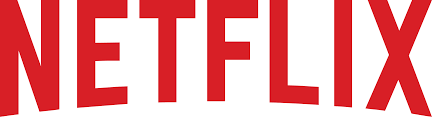
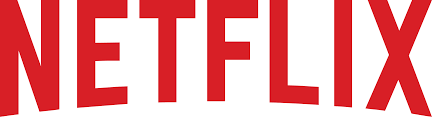

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
# from gensim.corpora import Dictionary
from collections import defaultdict

# collect values: {"key_name":["number of reccords with key","number of empty recpords",
                                # "max_size","min_size","avg_size"]}
used_keys = defaultdict(lambda:[0,0,
                               1e10,-1,0])

tags = set()
languages = defaultdict(str)
# vocabulary = Dictionary()

for file_path in data_index.path_metadata:
    file_dict = load_metadata(file_path)
    for k in file_dict.keys():
        # number of records and number of missing 
        used_keys[k][0] += 1
        if len(str(file_dict[k]))==0:
            used_keys[k][1] += 1
        
        # number of words
        if len(str(file_dict[k]))!=0:
            current_seq_len = max( len(str(file_dict[k]).split(" ")),
                                   len(str(file_dict[k]).split("-")),
                                   len(str(file_dict[k]).split(","))
                                 )
            # current_seq_len = len(str(file_dict[k]).split(" "))
            
            used_keys[k][2] = min(used_keys[k][2],current_seq_len)
            used_keys[k][3] = max(used_keys[k][3],current_seq_len)
            used_keys[k][4] += current_seq_len
        
        # language detection
        if type(file_dict[k]) is str and len(file_dict[k])>0:
            try:
                detected_lang = detect(file_dict[k])
                languages[detected_lang] = [file_dict[k],file_path]
            except Exception  as e:
                print(e,"Language is not detected:",file_dict[k])
        
        for word in file_dict['keywords']:
            tags.add(word)
        
    
    # vocabulary.add_documents()

used_keys = dict(used_keys)
used_keys = pd.DataFrame(used_keys)
used_keys = used_keys.T.reset_index()
used_keys.columns = ["key_name","number of reccords with key","number of empty recpords","min_size","max_size","avg_size"]
used_keys["avg_size"] = used_keys["avg_size"]/(659 - used_keys["number of empty recpords"])

In [195]:
languages

defaultdict(str,
            {'en': ["I have gathered this dataset  by scraping the rolling page of the steam search site: https://store.steampowered.com/search/?category1=998&ndl=1&ignore_preferences=1\nThe data has been scraped in early September.\nThe data is unorganized and needs cleaning.\n\nIf you want to see how I created recommendation system below you can read the description and ordering of notebooks. (check notebooks by owner)\n\nNames of notebooks:\n- Preprocessing\n- EDA of preprocessed data\n- ML_Analysis_Main\n- ML_Analysis _improving\n- Recommendation System - Hybrid (the main target)\n- Recommendations system Item-based (just for example)\n\nA small description\n\nWe started by scraping a video game platform steam. We used a rolling page in which the games were loaded endlessly while scrolling until games ran out. The order is less important. In the first scraping phase, we obtained Game data, namely name, price, discounted price, release date, and Link. Later, using t

In [ ]:
tags

In [113]:
used_keys

,key_name,number of reccords with key,number of empty recpords,min_size,max_size,avg_size
0,id,659,0,1,10,3.887709
1,id_no,659,0,1,1,1.000000
2,datasetSlugNullable,659,0,1,10,3.887709
3,ownerUserNullable,659,0,1,1,1.000000
4,usabilityRatingNullable,659,0,1,1,1.000000
5,titleNullable,659,0,1,12,4.063733
6,subtitleNullable,659,79,1,19,8.275862
7,descriptionNullable,659,75,4,11140,369.340753
8,datasetId,659,0,1,1,1.000000
9,datasetSlug,659,0,1,10,3.887709


## find empty elements

In [165]:
def set_empty_index(data_index):
    """
    This function search for datasets which contains empty fields
    Paramteres:
    ----------
        data_index: pd.DataFrame
            with "user_folder_name","data_folder_name",
                 "path_dataset","path_metadata"
    """
    is_empty = []

    path_columns = "path_metadata"
    if "path_metadata" in data_index.columns:
        path_column = "path_metadata"
    else:
        path_column = "path to metadata"
    
    for file_path in data_index[path_column]:
        file_dict = load_metadata(file_path)
        any_elem_empty = False
        column_name = ""
        for k in file_dict.keys():
            if len(str(file_dict[k]))==0:
                any_elem_empty=True
                column_name=k
                break
        is_empty.append(any_elem_empty)    
    data_index["is_empty"] = is_empty
    return data_index

In [ ]:
# data_index = set_empty_index(data_index)
# print(data_index.is_empty.sum())
# data_index = data_index[data_index.is_empty==False]
# data_index

In [168]:
# search_data_index_hot
search_data_index_hot = set_empty_index(search_data_index_hot)
print(search_data_index_hot.is_empty.sum())
print(search_data_index_hot.is_empty.sum()/len(search_data_index_hot))
search_data_index_hot[search_data_index_hot.is_empty==True]

70
0.10159651669085631


,query name,rating_hottest,path to metadata,is_empty
18,Top 1000 Movies Dataset,19,../datasets/raw_datasets/metadata-for-search/a...,True
23,mental health,3,../datasets/raw_datasets/metadata-for-search/o...,True
38,mental health,18,../datasets/raw_datasets/metadata-for-search/o...,True
49,dataset related to mental health,9,../datasets/raw_datasets/metadata-for-search/c...,True
65,emotion detection and sentiment classification,5,../datasets/raw_datasets/metadata-for-search/m...,True
...,...,...,...,...
653,text classification,4,../datasets/raw_datasets/metadata-for-search/t...,True
663,text classification,14,../datasets/raw_datasets/metadata-for-search/s...,True
670,classification,1,../datasets/raw_datasets/metadata-for-search/u...,True
675,classification,6,../datasets/raw_datasets/metadata-for-search/u...,True


In [177]:
temp = search_data_index_hot[search_data_index_hot.is_empty==True]
temp['path to metadata'][18]

'../datasets/raw_datasets/metadata-for-search/adityaghuse/imdb-top-1000/dataset-metadata.json'

In [169]:
# search_data_index_active
search_data_index_active = set_empty_index(search_data_index_active)
search_data_index_active = set_empty_index(search_data_index_active)
print(search_data_index_active.is_empty.sum())
print(search_data_index_active.is_empty.sum()/len(search_data_index_active))
search_data_index_active[search_data_index_active.is_empty==True]

151
0.3304157549234136


,query name,rating_active,path to metadata,is_empty
1,Top 1000 Movies Dataset,2,../datasets/raw_datasets/metadata-for-search/e...,True
2,Top 1000 Movies Dataset,3,../datasets/raw_datasets/metadata-for-search/s...,True
3,Top 1000 Movies Dataset,4,../datasets/raw_datasets/metadata-for-search/k...,True
6,Top 1000 Movies Dataset,7,../datasets/raw_datasets/metadata-for-search/i...,True
7,Top 1000 Movies Dataset,8,../datasets/raw_datasets/metadata-for-search/w...,True
...,...,...,...,...
449,classification,13,../datasets/raw_datasets/metadata-for-search/n...,True
450,classification,14,../datasets/raw_datasets/metadata-for-search/n...,True
453,classification,17,../datasets/raw_datasets/metadata-for-search/s...,True
455,classification,19,../datasets/raw_datasets/metadata-for-search/h...,True


In [170]:
# search_data_index_vote
search_data_index_vote = set_empty_index(search_data_index_vote)
print(search_data_index_vote.is_empty.sum())
print(search_data_index_vote.is_empty.sum()/len(search_data_index_vote))
search_data_index_vote[search_data_index_vote.is_empty==True]

254
0.14879906268306972


,query name,rating,path to metadata,is_empty
11,Top 1000 Movies Dataset,9,../datasets/raw_datasets/metadata-for-search/t...,True
20,Top 1000 Movies Dataset,18,../datasets/raw_datasets/metadata-for-search/a...,True
21,Top 1000 Movies Dataset,19,../datasets/raw_datasets/metadata-for-search/e...,True
24,Top 1000 Movies Dataset,22,../datasets/raw_datasets/metadata-for-search/i...,True
26,Top 1000 Movies Dataset,24,../datasets/raw_datasets/metadata-for-search/a...,True
...,...,...,...,...
1657,classification,4,../datasets/raw_datasets/metadata-for-search/o...,True
1660,classification,7,../datasets/raw_datasets/metadata-for-search/u...,True
1661,classification,8,../datasets/raw_datasets/metadata-for-search/z...,True
1664,classification,11,../datasets/raw_datasets/metadata-for-search/u...,True


## Dataset to csv

Сolumns used:

"title"
"subtitle"
"description"
"keywords"
"titleNullable"
"subtitleNullable"
"descriptionNullable"

In [200]:
import collections
def collect_text_columns_to_single_text(used_data_columns,text_dict):
    """
    Join all texts elemnt into single string
    """
    full_text = ""
    for c in used_data_columns:
        if c == "keywords":
            full_text = full_text + " " + " ".join(text_dict[c])
            continue
        full_text = full_text + " " + text_dict[c]
        
    return full_text

# data_index:pd.DataFrame,process_text: funct    
def collect_data_to_csv(data_index,process_text,is_tokenized=True):
    """
    load json dataset into csv file (all texts are preprocessed with process_text)
    we use fileds used_data_columns (["title", "subtitle","description",
                  "keywords", "titleNullable", "subtitleNullable",
                  "descriptionNullable"])
    on csv file we store
                    list of words for each used_data_columns,
                    list of tokens for each used_data_columns,
                    list of words and tokens for full text
    """
    dataset = defaultdict(list)
    used_data_columns = ["title", "subtitle","description",
                         "keywords", "titleNullable", "subtitleNullable",
                         "descriptionNullable"]
    #list of columns to join into one text
    used_data_columns_text = ["title", "subtitle","description",
                         "keywords"]
    init_vocabulary()

    
    for id,row_elem in data_index.iterrows():
        # if row_elem["is_empty"]:
        #     continue
        file_path = row_elem["path to metadata"]

        
        file = load_metadata(file_path)
        dataset["path"].append(file_path)
        # add id
        dataset["id"].append(id)
        # load to new dataset column which has same name in file and in new dataset
        for column in used_data_columns:
            text = process_text(file[column],text_source=column)
            dataset[column].append(text)
            
            # create tokens for columm
            if is_tokenized:
                append_vocabulary(text_list=text)
                text_tokens = tokenize_text(text_list = text)
                dataset[column+"_token_id"].append(text_tokens)

        # load to new dataset column which is absent in file
        full_text = collect_text_columns_to_single_text(used_data_columns_text,file)
        full_text = process_text(full_text,text_source=column)
        dataset["text"].append(full_text)
        
        # create tokens full text tokens
        if is_tokenized:
            append_vocabulary(text_list=full_text)
            tokens = tokenize_text(text_list=full_text)
            dataset["token_id"].append(tokens)

    return pd.DataFrame(dataset)

In [201]:
# data_index = pd.read_csv(DATA_INDEX_PATH + "data_index.csv")

In [33]:
dataset = collect_data_to_csv(data_index,preprocess_text)
# dataset = collect_data_to_csv(data_index,preprocess_stemming_text)

In [37]:
dataset.head()

,path,title,title_token_id,subtitle,subtitle_token_id,description,description_token_id,keywords,keywords_token_id,titleNullable,titleNullable_token_id,subtitleNullable,subtitleNullable_token_id,descriptionNullable,descriptionNullable_token_id,text,token_id
0,../datasets/raw_datasets/kaggle/vijendersingh4...,"[Research, Paper]","[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[NLP, Based, Research, Papers]","[5, 4, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[#, #, #, Context, The, dataset, consists, of,...","[7, 7, 7, 20, 33, 56, 49, 81, 106, 94, 89, 68,...","[research, earth and nature, education, nlp]","[94, 119, 120, 121, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[Research, Paper]","[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[NLP, Based, Research, Papers]","[5, 4, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[#, #, #, Context, The, dataset, consists, of,...","[7, 7, 7, 20, 33, 56, 49, 81, 106, 94, 89, 68,...","[Research, Paper, NLP, Based, Research, Papers...","[3, 2, 5, 4, 3, 6, 7, 7, 7, 20, 33, 56, 49, 81..."
1,../datasets/raw_datasets/kaggle/kamalesh1997/t...,"[Top, Rated, movies, -TMDB, data, set]","[126, 125, 127, 124, 55, 128, 0, 0, 0, 0, 0, 0...","[Dataset, of, Top, rated, movies, from, the, T...","[129, 81, 126, 133, 127, 132, 103, 130, 131, 0...","[Context, User, can, make, use, of, the, datas...","[20, 140, 46, 75, 146, 81, 103, 56, 68, 144, 1...","[arts and entertainment, beginner, intermediat...","[147, 148, 149, 150, 151, 0, 0, 0, 0, 0, 0, 0,...","[Top, Rated, movies, -TMDB, data, set]","[126, 125, 127, 124, 55, 128, 0, 0, 0, 0, 0, 0...","[Dataset, of, Top, rated, movies, from, the, T...","[129, 81, 126, 133, 127, 132, 103, 130, 131, 0...","[Context, User, can, make, use, of, the, datas...","[20, 140, 46, 75, 146, 81, 103, 56, 68, 144, 1...","[Top, Rated, movies, -TMDB, data, set, Dataset...","[126, 125, 127, 124, 55, 128, 129, 81, 126, 13..."
2,../datasets/raw_datasets/kaggle/charanjilagam/...,"[IPL_WIN_PREDICTION, (, 98, %, ACCURACY, )]","[161, 157, 159, 156, 160, 158, 0, 0, 0, 0, 0, ...","[IPL, WIN, PREDICTION, FROM, 2008, TO, 2016]","[165, 168, 166, 164, 162, 167, 163, 0, 0, 0, 0...","[With, the, preprocessed, dataset, at, hand, ,...","[188, 103, 275, 56, 199, 237, 9, 110, 46, 263,...",[cricket],"[324, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[IPL_WIN_PREDICTION, (, 98, %, ACCURACY, )]","[161, 157, 159, 156, 160, 158, 0, 0, 0, 0, 0, ...","[IPL, WIN, PREDICTION, FROM, 2008, TO, 2016]","[165, 168, 166, 164, 162, 167, 163, 0, 0, 0, 0...","[With, the, preprocessed, dataset, at, hand, ,...","[188, 103, 275, 56, 199, 237, 9, 110, 46, 263,...","[IPL_WIN_PREDICTION, (, 98, %, ACCURACY, ), IP...","[161, 157, 159, 156, 160, 158, 165, 168, 166, ..."
3,../datasets/raw_datasets/kaggle/michaelbryantd...,"[FiveThirtyEight, Election, Polls, Dataset]","[326, 325, 327, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[For, presidential, ,, house, ,, senate, ,, an...","[328, 332, 9, 331, 9, 333, 9, 39, 330, 329, 0,...","[FiveThirtyEight, ,, sometimes, rendered, as, ...","[326, 9, 378, 377, 197, 338, 9, 70, 356, 340, ...","[politics, exploratory data analysis, classifi...","[372, 384, 206, 282, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[FiveThirtyEight, Election, Polls, Dataset]","[326, 325, 327, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[For, presidential, ,, house, ,, senate, ,, an...","[328, 332, 9, 331, 9, 333, 9, 39, 330, 329, 0,...","[FiveThirtyEight, ,, sometimes, rendered, as, ...","[326, 9, 378, 377, 197, 338, 9, 70, 356, 340, ...","[FiveThirtyEight, Election, Polls, Dataset, Fo...","[326, 325, 327, 129, 328, 332, 9, 331, 9, 333,..."
4,../datasets/raw_datasets/kaggle/sonialikhan/ho...,"[Household, Electric, Power, Consumption]","[388, 387, 389, 386, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[time, series, analysis-, regression, /, clust...","[393, 392, 391, 282, 390, 208, 0, 0, 0, 0, 0, ...","[*, *, About, Dataset, *, *, I, need, help, to...","[395, 395, 418, 129, 395, 395, 27, 261, 65, 10...",[electricity],"[546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [202]:
dataset_active = collect_data_to_csv(search_data_index_active,no_process_text,is_tokenized=False)
dataset_hot = collect_data_to_csv(search_data_index_hot,no_process_text,is_tokenized=False)
dataset_vote = collect_data_to_csv(search_data_index_vote,no_process_text,is_tokenized=False)

In [204]:
search_data_index_active

,query name,rating_active,path to metadata,is_empty
0,Top 1000 Movies Dataset,1,../datasets/raw_datasets/metadata-for-search/r...,False
1,Top 1000 Movies Dataset,2,../datasets/raw_datasets/metadata-for-search/e...,True
2,Top 1000 Movies Dataset,3,../datasets/raw_datasets/metadata-for-search/s...,True
3,Top 1000 Movies Dataset,4,../datasets/raw_datasets/metadata-for-search/k...,True
4,Top 1000 Movies Dataset,5,../datasets/raw_datasets/metadata-for-search/d...,False
...,...,...,...,...
452,classification,16,../datasets/raw_datasets/metadata-for-search/n...,False
453,classification,17,../datasets/raw_datasets/metadata-for-search/s...,True
454,classification,18,../datasets/raw_datasets/metadata-for-search/c...,False
455,classification,19,../datasets/raw_datasets/metadata-for-search/h...,True


### load to json

In [205]:
dataset_hot.to_json(PROCESSED_DATA_PATH+"/search_dataset_hot.json")
dataset_vote.to_json(PROCESSED_DATA_PATH+"/search_dataset_vote.json")
dataset_active.to_json(PROCESSED_DATA_PATH+"/search_dataset_active.json")